# PROJECT: Loan_Eligibility_Prediction (Approved Or Not Approved)

# BY: Ahmed Ezzat 

# Economic Data Scientist and Machine Learning Engineer.

# Ph.D. researcher in macroeconomics and public finance using Machine Learning algorithms.

# ***Introduction to the problem.***

## About Dataset

### About Company:-
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first apply for a home loan after that company validates the customer eligibility for a 
loan.

### Problem Statement:-

Understanding the problem statement is the first and foremost step. This would help you give an intuition of what you will face ahead of time. Let us see the problem statement -

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s).Classification can be of two types:
Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features.

Binary Classification : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.

Multiclass Classification : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.

Although this notebook is specifically built to give you a walkthrough of Loan Prediction problem, you can always refer the content to get a comprehensive overview to solve a classification problem.
    

### Features dataset:-
***1.LoanID =***             Unique Loan ID

***2.Gender =***             Male/ Female

***3.Married =***            Applicant married (Y/N)

***4.Dependents =***         Number of dependents

***5.Education =***          Applicant Education (Graduate/ Under Graduate)

***6.SelfEmployed =***       Self-employed (Y/N)

***7.Applicant_Income =***    Applicant income

***8.Coapplicant income =***  Coapplicant income

***9.Loan_Amount =***         Loan amount in thousands

***10.LoanA_mount_Term =***  Term of the loan in months

***11.Credit_History =***    Credit history meets guidelines 12.PropertyArea= Urban/ Semi-Urban/ Rural

***13.Loan_Status =***        (Target) Loan approved (Y/N)  

# ----------------------------------------

***Loan_Statu (Target) =dependent_variable***

***other features(independent_variables)***

# -----------------------------------------

***Here we measure the effect of the independent variables on the dependent variable (Loan_Statu (Target)).***

https://www.kaggle.com/search?q=Loan+Prediction+Dream+Housing+Finance

# Let’s look at the steps that we will follow in this notebook:

***1.Import Important Libraries And Read Data***

***2.Understanding the data***

***3.Hypothesis Generation or Hypothesis testing***

***5.Exploratory Data Analysis (EDA)***

***i)Univariate Analysis***

***ii)Bivariate Analysis***

***6.Missing value and outlier treatment***

***7.Feature Engineering***

***8.Data PreProcessing.***

***9.Model Building :***

i)LogisticRegression

ii)KNeighborsClassifier

iii)DecisionTreeClassifier

iv)RandomForestClassifier with Grid Search

v)XGBClassifier


# 1- Import Important Libraries And Read Data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train_ctrUa4K.csv")# 4,6(the important),7
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [143]:
#df_copy = df.copy() this is code for making all_process on acopy data from original_data.

# 2- Understanding the data

### Business Understanding

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [145]:
df.dtypes# this is code for checking the datatype of all data.

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see there are three format of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.

int64: It represents the integer variables. ApplicantIncome is of this format.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

In [146]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [147]:
df.shape

(614, 13)

# 3.Hypothesis Generation and testing.
After looking at the problem statement, we will now move into hypothesis generation. It is the process of listing out all the possible factors that can affect the outcome.

What is hypothesis generation?
This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

Salary: Applicants with high income should have more chances of loan approval.

Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.

Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

Loan term: Loan for less time period and less amount should have higher chances of approval.

EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

These are some of the factors which i think can affect the target variable, you can come up with many more factors

# 4- Exploratory Data Analysis with numpy and pandas(EDA):

# Univariate Analysis:

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually.

For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.

For numerical features, probability density plots can be used to look at the distribution of the variable.

In [148]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [149]:
#feature I-0
df["Loan_ID"]

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

In [150]:
#feature I-0
df.drop("Loan_ID", axis=1, inplace = True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [151]:
#feature I-1
df["Gender"]

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [152]:
df["Gender"].unique().tolist()

['Male', 'Female', nan]

In [153]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [154]:
df["Gender"].value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

In [155]:
df["Gender"].value_counts(normalize=True).reset_index()

,index,Gender
0,Male,0.813644
1,Female,0.186356


<AxesSubplot:xlabel='Gender', ylabel='count'>

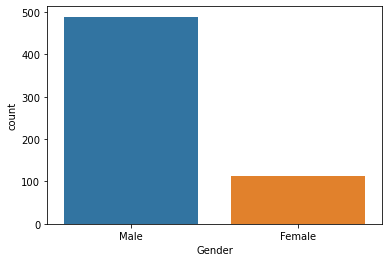

In [156]:
sns.countplot(data = df, x="Gender" )

In [157]:
#feature I-2
df["Married"].unique().tolist()

['No', 'Yes', nan]

In [158]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [159]:
df["Married"].value_counts(normalize=True)*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

In [160]:
df["Married"].value_counts(normalize=True).reset_index()

,index,Married
0,Yes,0.651391
1,No,0.348609


<AxesSubplot:xlabel='Married', ylabel='count'>

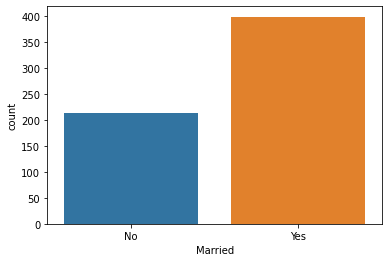

In [161]:
sns.countplot(data = df, x="Married" )

In [162]:
#feature I-3
df["Dependents"]

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [163]:
df["Dependents"].unique().tolist()

['0', '1', '2', '3+', nan]

In [164]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [165]:
df["Dependents"].value_counts(normalize=True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

In [166]:
df["Dependents"].value_counts(normalize=True).reset_index()

,index,Dependents
0,0,0.575960
1,1,0.170284
2,2,0.168614
3,3+,0.085142


<AxesSubplot:xlabel='Dependents', ylabel='count'>

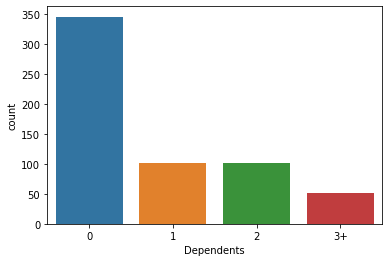

In [102]:
sns.countplot(data = df,x ="Dependents")

In [103]:
#feature I-4
df["Education"].unique().tolist()

['Graduate', 'Not Graduate']

In [104]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [105]:
df["Education"].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

In [106]:
df["Education"].value_counts(normalize=True).reset_index()

,index,Education
0,Graduate,0.781759
1,Not Graduate,0.218241


<AxesSubplot:xlabel='Education', ylabel='count'>

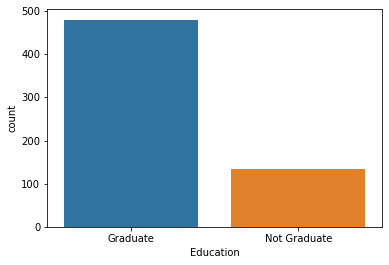

In [107]:
sns.countplot(data = df,x ="Education")

In [108]:
#feature I-5
df["Self_Employed"].unique().tolist()

['No', 'Yes', nan]

In [109]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [110]:
df["Self_Employed"].value_counts(normalize=True)*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

In [111]:
df["Self_Employed"].value_counts(normalize=True).reset_index()

,index,Self_Employed
0,No,0.859107
1,Yes,0.140893


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

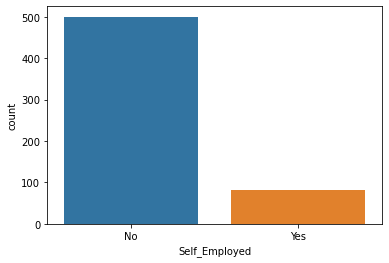

In [112]:
sns.countplot(data = df,x ="Self_Employed")

In [113]:
#feature I-6                                                                                                                            
df["ApplicantIncome"]

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

In [114]:
df["ApplicantIncome"].unique().tolist()

[5849,
 4583,
 3000,
 2583,
 6000,
 5417,
 2333,
 3036,
 4006,
 12841,
 3200,
 2500,
 3073,
 1853,
 1299,
 4950,
 3596,
 3510,
 4887,
 2600,
 7660,
 5955,
 3365,
 3717,
 9560,
 2799,
 4226,
 1442,
 3750,
 4166,
 3167,
 4692,
 3500,
 12500,
 2275,
 1828,
 3667,
 3748,
 3600,
 1800,
 2400,
 3941,
 4695,
 3410,
 5649,
 5821,
 2645,
 4000,
 1928,
 3086,
 4230,
 4616,
 11500,
 2708,
 2132,
 3366,
 8080,
 3357,
 3029,
 2609,
 4945,
 5726,
 10750,
 7100,
 4300,
 3208,
 1875,
 4755,
 5266,
 1000,
 3333,
 3846,
 2395,
 1378,
 3988,
 2366,
 8566,
 5695,
 2958,
 6250,
 3273,
 4133,
 3620,
 6782,
 2484,
 1977,
 4188,
 1759,
 4288,
 4843,
 13650,
 4652,
 3816,
 3052,
 11417,
 7333,
 3800,
 2071,
 5316,
 2929,
 3572,
 7451,
 5050,
 14583,
 2214,
 5568,
 10408,
 5667,
 2137,
 2957,
 3692,
 23803,
 3865,
 10513,
 6080,
 20166,
 2014,
 2718,
 3459,
 4895,
 3316,
 14999,
 4200,
 5042,
 6950,
 2698,
 11757,
 2330,
 14866,
 1538,
 10000,
 4860,
 6277,
 2577,
 9166,
 2281,
 3254,
 39999,
 9538,
 2980,
 186

In [115]:
df["ApplicantIncome"].value_counts().head(20)

2500    9
6000    6
2600    6
4583    6
4166    5
5000    5
3333    5
3750    5
2400    4
8333    4
2583    4
6250    4
3500    3
4333    3
4000    3
3167    3
3166    3
5417    3
3000    3
3400    3
Name: ApplicantIncome, dtype: int64

In [116]:
df["ApplicantIncome"].describe()#Min, 25%-----> Q1 ,50% ------>meadian(Q2),75%---------(Q3),Max = Five Number Summary.(Q3-Q2=IQR)

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [117]:
df.ApplicantIncome.sum()/614

5403.459283387622

In [118]:
df["ApplicantIncome"].value_counts(normalize=True)*100

2500    1.465798
6000    0.977199
2600    0.977199
4583    0.977199
4166    0.814332
          ...   
5503    0.162866
3450    0.162866
2425    0.162866
2423    0.162866
4095    0.162866
Name: ApplicantIncome, Length: 505, dtype: float64

In [119]:
df["ApplicantIncome"].value_counts(normalize=True).reset_index()

,index,ApplicantIncome
0,2500,0.014658
1,6000,0.009772
2,2600,0.009772
3,4583,0.009772
4,4166,0.008143
...,...,...
500,5503,0.001629
501,3450,0.001629
502,2425,0.001629
503,2423,0.001629


In [120]:
df["ApplicantIncome"].sort_values(ascending=False).head(20)

409    81000
333    63337
171    51763
155    39999
185    39147
443    37719
183    33846
126    23803
506    20833
284    20667
308    20233
130    20166
369    19730
561    19484
487    18333
534    18165
525    17500
493    17263
467    16692
478    16667
Name: ApplicantIncome, dtype: int64

In [121]:
#Types_of_Distribution--------------left_skewed(median > mean),normal_distribution(bell_curve)symmetric(mean=median=mode),right_skewed(mean > median)

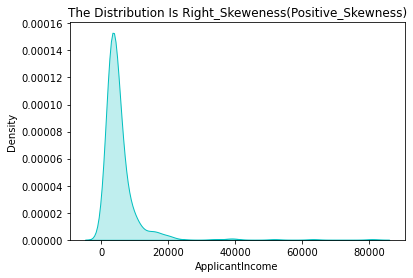

In [122]:
sns.kdeplot(color = "c",data =df,x= "ApplicantIncome",shade=True)# the distribution is right_skeweness(mean > median)positive skewness
plt.title("The Distribution Is Right_Skeweness(Positive_Skewness)");

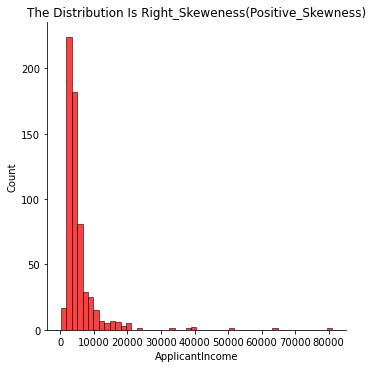

In [123]:
sns.displot(df["ApplicantIncome"],color="r",bins=50)
plt.title("The Distribution Is Right_Skeweness(Positive_Skewness)");

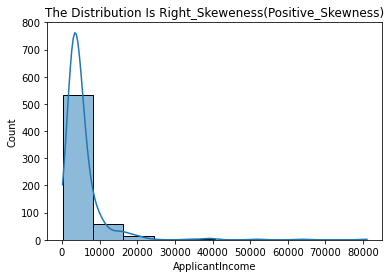

In [124]:
sns.histplot(data =df,x= "ApplicantIncome",bins=10,kde =True)
plt.title("The Distribution Is Right_Skeweness(Positive_Skewness)");

In [125]:
#Majority of ApplicantIncome’s income ranges from 0 to 10000.00 ,We also see a lot of outliers in the ApplicantIncome income and it is not normally distributed.

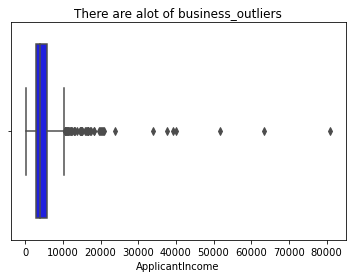

In [126]:
sns.boxplot(data =df,x= "ApplicantIncome",color= "b")#for detect outliers#box=IQR
plt.title("There are alot of business_outliers");

In [127]:
#feature I-7
df["CoapplicantIncome"]

0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 614, dtype: float64

***Co-Applicant***                     ***vs. Co-Signer***

A co-applicant is often confused with a co-signer, but they aren’t the same thing. A co-applicant is applying for the loan alongside the borrower, and both parties share in the responsibility and the benefits of receiving the loan.

### Co-Applicant  

Shares the responsibility for repaying the loan with another borrower.                                
Applies for and benefits from the loan as much as the primary applicant                              
May or may not have a good credit history, income, or assets.                                    
Is potentially a lower risk for the lender because there are more resources going toward loan repayment.      

### Co-Signer

Agrees to take responsibility for the loan if the main borrower can’t repay it.
Helps the primary borrower due to their own good credit history.
Usually has a good credit history and/or sufficient income and assets to smooth loan qualification for the primary borrower.
Is a lower risk for the lender because the co-signer is responsible for repaying the loan if the borrower can’t.





In [128]:
df["CoapplicantIncome"].unique().tolist()

[0.0,
 1508.0,
 2358.0,
 4196.0,
 1516.0,
 2504.0,
 1526.0,
 10968.0,
 700.0,
 1840.0,
 8106.0,
 2840.0,
 1086.0,
 3500.0,
 5625.0,
 1911.0,
 1917.0,
 2925.0,
 2253.0,
 1040.0,
 2083.0,
 3369.0,
 1667.0,
 3000.0,
 2067.0,
 1330.0,
 1459.0,
 7210.0,
 1668.0,
 1213.0,
 2336.0,
 3440.0,
 2275.0,
 1644.0,
 1167.0,
 1591.0,
 2200.0,
 2250.0,
 2859.0,
 3796.0,
 3449.0,
 4595.0,
 2254.0,
 3066.0,
 1875.0,
 1774.0,
 4750.0,
 3022.0,
 4000.0,
 2166.0,
 1881.0,
 2531.0,
 2000.0,
 2118.0,
 4167.0,
 2900.0,
 5654.0,
 1820.0,
 2302.0,
 997.0,
 3541.0,
 3263.0,
 3806.0,
 3583.0,
 754.0,
 1030.0,
 1126.0,
 3600.0,
 2333.0,
 4114.0,
 2283.0,
 1398.0,
 2142.0,
 2667.0,
 8980.0,
 2014.0,
 1640.0,
 3850.0,
 2569.0,
 1929.0,
 7750.0,
 1430.0,
 2034.0,
 4486.0,
 1425.0,
 1666.0,
 830.0,
 3750.0,
 1041.0,
 1280.0,
 1447.0,
 3166.0,
 3333.0,
 1769.0,
 736.0,
 1964.0,
 1619.0,
 11300.0,
 1451.0,
 7250.0,
 5063.0,
 2138.0,
 5296.0,
 2583.0,
 2365.0,
 2816.0,
 2500.0,
 1083.0,
 1250.0,
 3021.0,
 983.0,
 1800.0,

In [129]:
df["CoapplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [130]:
df["CoapplicantIncome"].value_counts(normalize=True)*100

0.0       44.462541
2500.0     0.814332
2083.0     0.814332
1666.0     0.814332
1625.0     0.488599
            ...    
2365.0     0.162866
1695.0     0.162866
2466.0     0.162866
2375.0     0.162866
1700.0     0.162866
Name: CoapplicantIncome, Length: 287, dtype: float64

In [131]:
df["CoapplicantIncome"].value_counts(normalize=True).reset_index()

,index,CoapplicantIncome
0,0.0,0.444625
1,2500.0,0.008143
2,2083.0,0.008143
3,1666.0,0.008143
4,1625.0,0.004886
...,...,...
282,2365.0,0.001629
283,1695.0,0.001629
284,2466.0,0.001629
285,2375.0,0.001629


In [132]:
df["CoapplicantIncome"].sort_values(ascending=True).head(20)

0      0.0
339    0.0
338    0.0
333    0.0
332    0.0
331    0.0
329    0.0
326    0.0
324    0.0
319    0.0
341    0.0
318    0.0
313    0.0
312    0.0
310    0.0
309    0.0
308    0.0
612    0.0
305    0.0
302    0.0
Name: CoapplicantIncome, dtype: float64

In [133]:
df["CoapplicantIncome"].sort_values(ascending=False).head(20)

600    41667.0
581    33837.0
417    20000.0
402    20000.0
177    11300.0
9      10968.0
122     8980.0
444     8333.0
12      8106.0
372     7873.0
135     7750.0
180     7250.0
38      7210.0
523     7166.0
253     7101.0
506     6667.0
513     6666.0
349     6250.0
242     5701.0
91      5654.0
Name: CoapplicantIncome, dtype: float64

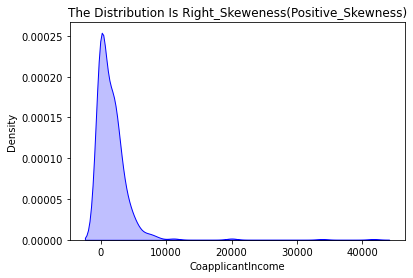

In [134]:
sns.kdeplot(color = "b",data =df,x= "CoapplicantIncome",shade=True)# the distribution is right_skeweness(mean > median)positive skewness
plt.title("The Distribution Is Right_Skeweness(Positive_Skewness)");

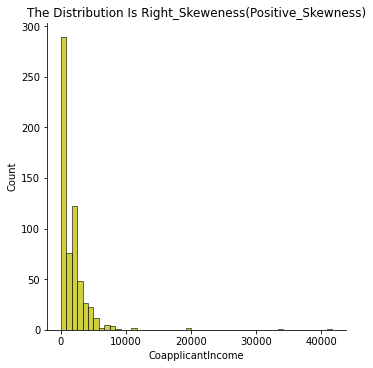

In [135]:
sns.displot(df["CoapplicantIncome"],color="y",bins=50)
plt.title("The Distribution Is Right_Skeweness(Positive_Skewness)");

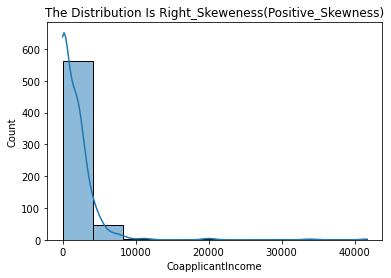

In [136]:
sns.histplot(data =df,x= "CoapplicantIncome",bins=10,kde =True)
plt.title("The Distribution Is Right_Skeweness(Positive_Skewness)");

In [137]:
#We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 7000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

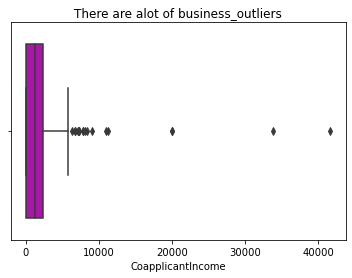

In [138]:
sns.boxplot(data =df,x= "CoapplicantIncome",color= "m")#for detect outliers#box=IQR
plt.title("There are alot of business_outliers");

In [139]:
#feature I-8
df["LoanAmount"]

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [140]:
df["LoanAmount"].unique().tolist()

[nan,
 128.0,
 66.0,
 120.0,
 141.0,
 267.0,
 95.0,
 158.0,
 168.0,
 349.0,
 70.0,
 109.0,
 200.0,
 114.0,
 17.0,
 125.0,
 100.0,
 76.0,
 133.0,
 115.0,
 104.0,
 315.0,
 116.0,
 112.0,
 151.0,
 191.0,
 122.0,
 110.0,
 35.0,
 201.0,
 74.0,
 106.0,
 320.0,
 144.0,
 184.0,
 80.0,
 47.0,
 75.0,
 134.0,
 96.0,
 88.0,
 44.0,
 286.0,
 97.0,
 135.0,
 180.0,
 99.0,
 165.0,
 258.0,
 126.0,
 312.0,
 136.0,
 172.0,
 81.0,
 187.0,
 113.0,
 176.0,
 130.0,
 111.0,
 167.0,
 265.0,
 50.0,
 210.0,
 175.0,
 131.0,
 188.0,
 25.0,
 137.0,
 160.0,
 225.0,
 216.0,
 94.0,
 139.0,
 152.0,
 118.0,
 185.0,
 154.0,
 85.0,
 259.0,
 194.0,
 93.0,
 370.0,
 182.0,
 650.0,
 102.0,
 290.0,
 84.0,
 242.0,
 129.0,
 30.0,
 244.0,
 600.0,
 255.0,
 98.0,
 275.0,
 121.0,
 63.0,
 700.0,
 87.0,
 101.0,
 495.0,
 67.0,
 73.0,
 260.0,
 108.0,
 58.0,
 48.0,
 164.0,
 170.0,
 83.0,
 90.0,
 166.0,
 124.0,
 55.0,
 59.0,
 127.0,
 214.0,
 240.0,
 72.0,
 60.0,
 138.0,
 42.0,
 280.0,
 140.0,
 155.0,
 123.0,
 279.0,
 192.0,
 304.0,
 330.0,

In [141]:
df["LoanAmount"].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [142]:
df["LoanAmount"].value_counts(normalize=True)*100

120.0    3.378378
110.0    2.871622
100.0    2.533784
160.0    2.027027
187.0    2.027027
           ...   
211.0    0.168919
250.0    0.168919
62.0     0.168919
85.0     0.168919
436.0    0.168919
Name: LoanAmount, Length: 203, dtype: float64

In [143]:
df["LoanAmount"].value_counts(normalize=True).reset_index()

,index,LoanAmount
0,120.0,0.033784
1,110.0,0.028716
2,100.0,0.025338
3,160.0,0.020270
4,187.0,0.020270
...,...,...
198,211.0,0.001689
199,250.0,0.001689
200,62.0,0.001689
201,85.0,0.001689


In [144]:
df["LoanAmount"].sort_values(ascending=True).head(20)

568     9.0
14     17.0
94     25.0
133    25.0
555    26.0
270    30.0
147    30.0
28     35.0
582    36.0
610    40.0
509    40.0
231    42.0
121    44.0
46     44.0
400    45.0
520    45.0
341    46.0
41     47.0
190    48.0
97     50.0
Name: LoanAmount, dtype: float64

In [145]:
#as We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

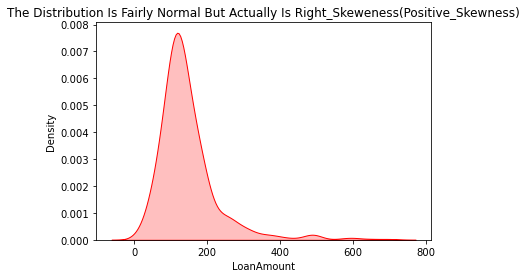

In [71]:
sns.kdeplot(color = "r",data =df,x= "LoanAmount",shade=True)# the distribution is right_skeweness(mean > median)positive skewness
plt.title("The Distribution Is Fairly Normal But Actually Is Right_Skeweness(Positive_Skewness)");

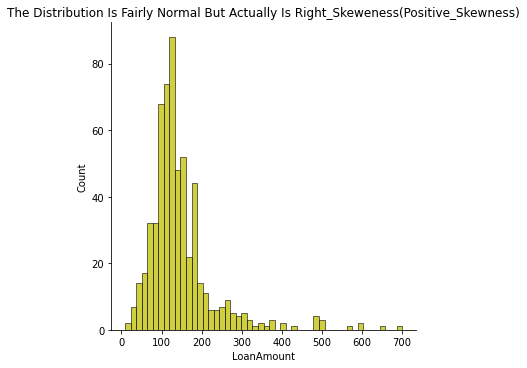

In [72]:
sns.displot(df["LoanAmount"],color="y",bins=50)
plt.title("The Distribution Is Fairly Normal But Actually Is Right_Skeweness(Positive_Skewness)");

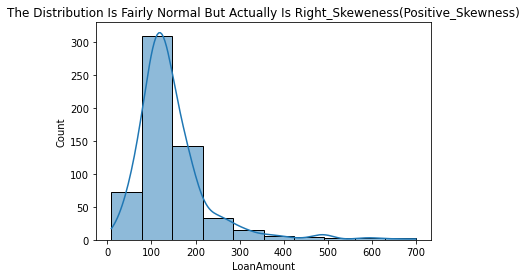

In [73]:
sns.histplot(data =df,x= "LoanAmount",bins=10,kde =True)
plt.title("The Distribution Is Fairly Normal But Actually Is Right_Skeweness(Positive_Skewness)");

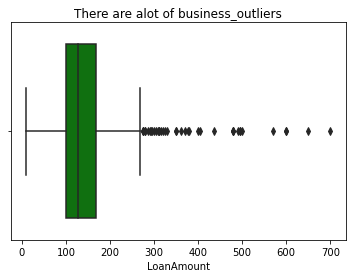

In [74]:
sns.boxplot(data =df,x= "LoanAmount",color= "g")#for detect outliers#box=IQR
plt.title("There are alot of business_outliers");

In [75]:
#feature I-9
df["Loan_Amount_Term"]

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [76]:
df["Loan_Amount_Term"].unique().tolist()

[360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0, 480.0, 36.0, 84.0, 12.0]

In [77]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [78]:
df["Loan_Amount_Term"].value_counts(normalize=True)*100   
#360.0    30years
#180.0    15years
#480.0    40years
#300.0    25years

360.0    85.333333
180.0     7.333333
480.0     2.500000
300.0     2.166667
84.0      0.666667
240.0     0.666667
120.0     0.500000
36.0      0.333333
60.0      0.333333
12.0      0.166667
Name: Loan_Amount_Term, dtype: float64

In [79]:
df["Loan_Amount_Term"].value_counts(normalize=True).reset_index()   

,index,Loan_Amount_Term
0,360.0,0.853333
1,180.0,0.073333
2,480.0,0.025000
3,300.0,0.021667
4,84.0,0.006667
5,240.0,0.006667
6,120.0,0.005000
7,36.0,0.003333
8,60.0,0.003333
9,12.0,0.001667


In [80]:
# As we can see, Loan_Amount_Term is a numeric values, but it is actually a categorical values.

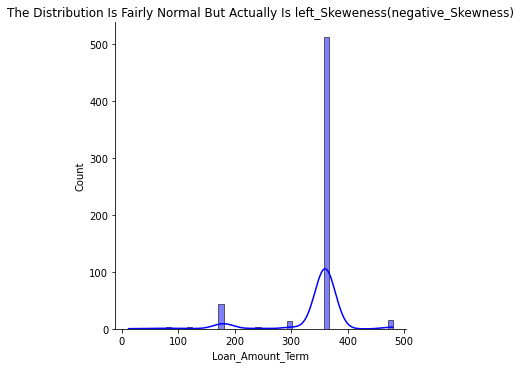

In [81]:
sns.displot(df["Loan_Amount_Term"],color="b",bins=50,kde =True)
plt.title("The Distribution Is Fairly Normal But Actually Is left_Skeweness(negative_Skewness)");

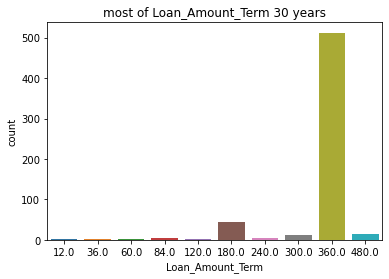

In [82]:
sns.countplot(data =df,x= "Loan_Amount_Term")#for detect outliers#box=IQR
plt.title("most of Loan_Amount_Term 30 years");

In [83]:
#feature I-10
df["Credit_History"].unique().tolist()

[1.0, 0.0, nan]

In [84]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [85]:
df["Credit_History"].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

In [86]:
df["Credit_History"].value_counts(normalize=True).reset_index()

,index,Credit_History
0,1.0,0.842199
1,0.0,0.157801


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

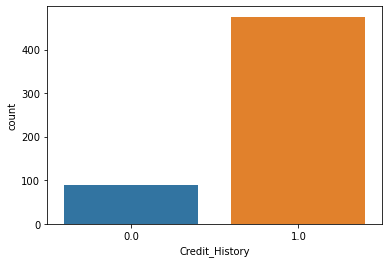

In [87]:
sns.countplot(data = df,x ="Credit_History")

In [88]:
#feature I-11
df["Property_Area"]

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object

In [89]:
df["Property_Area"].unique().tolist()

['Urban', 'Rural', 'Semiurban']

In [90]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [91]:
df["Property_Area"].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

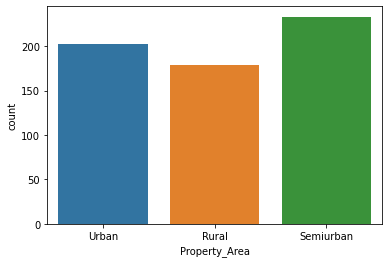

In [92]:
sns.countplot(data = df,x ="Property_Area")

In [1681]:
#feature I-12
df["Loan_Status"]

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [1682]:
df["Loan_Status"].unique().tolist()

['Y', 'N']

In [1683]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [1684]:
df["Loan_Status"].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [1685]:
df["Loan_Status"].value_counts(normalize=True).reset_index()

,index,Loan_Status
0,Y,0.687296
1,N,0.312704


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

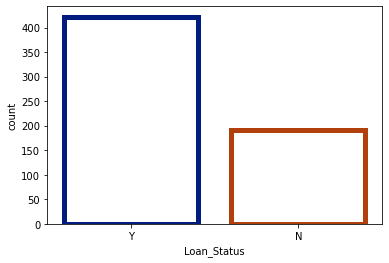

In [1686]:
sns.countplot(data = df,x ="Loan_Status",facecolor=(0, 0, 0, 0),
              linewidth=5, edgecolor=sns.color_palette("dark", 3))#palette="Set3"

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

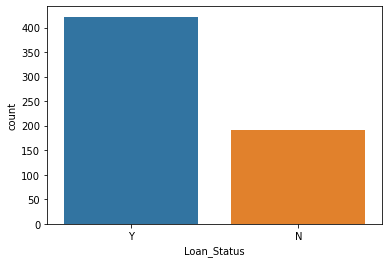

In [1687]:
sns.countplot(data = df,x ="Loan_Status")

# bia variate analysis

# Questions????

In [1688]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### 1-Is there a relationship between accepting the loan and the gender of the applicant? In other words, does the gender of the applicant have an effect and a reflection on the acceptance of the loan?

### 2-Is there a relationship between accepting the loan and the Social Situation of the applicant? In other words, does the Social Situation of the applicant have an effect and a reflection on the acceptance of the loan?


### 3-Is there a relationship between accepting the loan and the Number of dependents of the applicant? In other words, does the Number of dependents of the applicant have an effect and a reflection on the acceptance of the loan?


### 4-Is there a relationship between accepting the loan and the Educational Status of the applicant? In other words, does the Educational Status of the applicant have an effect and a reflection on the acceptance of the loan?


### 5-Is there a relationship between accepting the loan and the private work of the applicant? In other words, does the private work of the applicant have an effect and a reflection on the acceptance of the loan?


### 6-Is there a relationship between accepting the loan and the ApplicantIncome ? In other words, does the ApplicantIncome have an effect and a reflection on the acceptance of the loan?


### 7-Is there a relationship between accepting the loan and the CoapplicantIncome ? In other words, does the CoapplicantIncome have an effect and a reflection on the acceptance of the loan?


### 8-Is there a relationship between accepting the loan and the LoanAmount of the applicant? In other words, does the LoanAmount of the applicant have an effect and a reflection on the acceptance of the loan?


### 9-Is there a relationship between accepting the loan and the Loan_Amount_Term of the applicant? In other words, does the Loan_Amount_Term of the applicant have an effect and a reflection on the acceptance of the loan?


### 10-Is there a relationship between accepting the loan and the Credit_History of the applicant? In other words, does the Credit_History of the applicant have an effect and a reflection on the acceptance of the loan?


### 11-Is there a relationship between accepting the loan and the Property_Area of the applicant? In other words, does the Property_Area of the applicant have an effect and a reflection on the acceptance of the loan?

# Let's answer these questions in the light of the previously raised hypotheses

## Lets recall some of the hypotheses that we generated earlier and make some testing:

i)Applicants with high income should have more chances of loan approval.

ii)Applicants who have repaid their previous debts should have higher chances of loan approval.

iii)Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

iv)Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Lets try to test the above mentioned hypotheses using bivariate analysis.

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

## Answers Of Questions

In [1689]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1690]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### 1-Is there a relationship between accepting the loan and the gender of the applicant? In other words, does the gender of the applicant have an effect and a reflection on the acceptance of the loan?

In [1691]:
print(pd.crosstab(df["Loan_Status"],df["Gender"]))

Gender       Female  Male
Loan_Status              
N                37   150
Y                75   339


In [1692]:
pd.crosstab(df["Loan_Status"],df["Gender"]).reset_index()

Gender,Loan_Status,Female,Male
0,N,37,150
1,Y,75,339


In [1693]:
pd.crosstab(df["Loan_Status"],df["Gender"]).reset_index().value_counts(normalize=True)*100

Loan_Status  Female  Male
N            37      150     50.0
Y            75      339     50.0
dtype: float64

In [1694]:
print(pd.crosstab(df["Loan_Status"],df["Gender"]))

Gender       Female  Male
Loan_Status              
N                37   150
Y                75   339


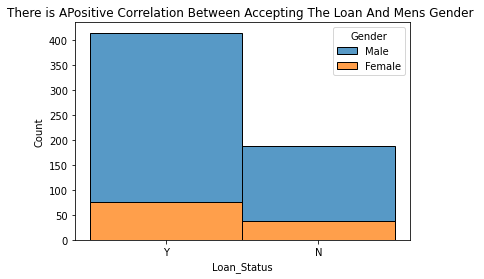

In [1695]:
sns.histplot(binwidth=0.5, x="Loan_Status", hue="Gender", data=df, stat="count", multiple="stack")
plt.title("There is APositive Correlation Between Accepting The Loan And Mens Gender ");

Number of Female whose Loan was approved : 75

Number of Male whose Loan was approved : 339

Number of Female whose Loan was not approved : 37

Number of Male whose Loan was not approved : 150

Proportion of Male applicants is higher for the approved loans.

### 2-Is there a relationship between accepting the loan and the Social Situation of the applicant? In other words, does the Social Situation of the applicant have an effect and a reflection on the acceptance of the loan?


In [1696]:
pd.crosstab(df["Married"],df["Loan_Status"]).reset_index()

Loan_Status,Married,N,Y
0,No,79,134
1,Yes,113,285


In [1697]:
print(pd.crosstab(df["Married"],df["Loan_Status"]))

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


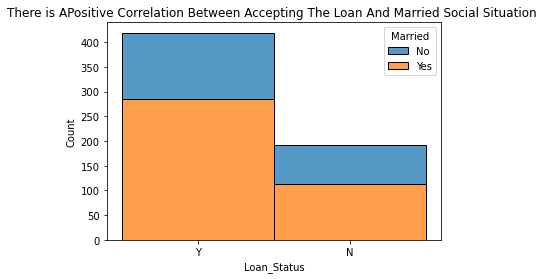

In [1698]:
sns.histplot(binwidth=0.5, x="Loan_Status", hue="Married", data=df, stat="count", multiple="stack")
plt.title("There is APositive Correlation Between Accepting The Loan And Married Social Situation ");

Number of married people whose Loan was approved : 398

Number of married people whose Loan was not approved : 213

Proportion of Married applicants is higher for the approved loans.

### 3-Is there a relationship between accepting the loan and the Number of dependents of the applicant? In other words, does the Number of dependents of the applicant have an effect and a reflection on the acceptance of the loan?


In [1699]:
print(pd.crosstab(df["Loan_Status"],df["Dependents"]))

Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33


In [1700]:
pd.crosstab(df["Loan_Status"],df["Dependents"])

Dependents,0,1,2,3+
Loan_Status,,,,
N,107,36,25,18
Y,238,66,76,33


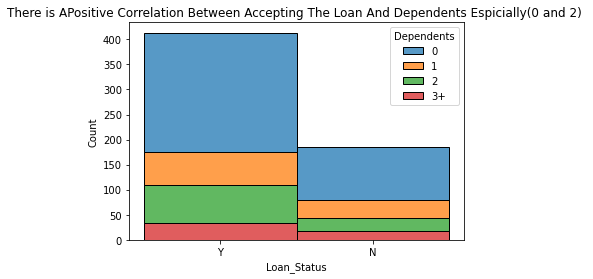

In [1701]:
sns.histplot(binwidth=0.5, x="Loan_Status", hue="Dependents", data=df, stat="count", multiple="stack")
plt.title("There is APositive Correlation Between Accepting The Loan And Dependents Espicially(0 and 2) ");

Number of dependents on the loan applicant : 0 and Loan was approved : 238

Number of dependents on the loan applicant : 0 and Loan was not approved : 107

Number of dependents on the loan applicant : 1 and Loan was approved : 66

Number of dependents on the loan applicant : 1 and Loan was not approved : 36

Number of dependents on the loan applicant : 2 and Loan was approved : 76

Number of dependents on the loan applicant : 2 and Loan was not approved : 25

Number of dependents on the loan applicant : 3+ and Loan was approved : 33

Number of dependents on the loan applicant : 3+ and Loan was not approved : 18

Proportion of dependents applicants(0 and 2) are higher for the approved loans.

### 4-Is there a relationship between accepting the loan and the Educational Status of the applicant? In other words, does the Educational Status of the applicant have an effect and a reflection on the acceptance of the loan?


In [1702]:
pd.crosstab(df["Loan_Status"],df["Education"])

Education,Graduate,Not Graduate
Loan_Status,,
N,140,52
Y,340,82


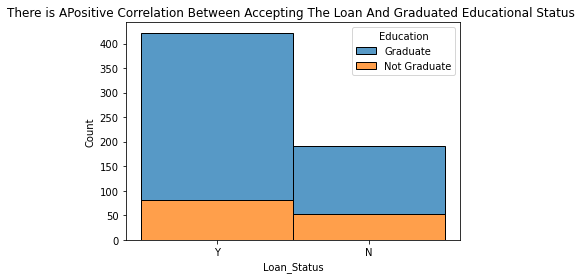

In [1703]:
sns.histplot(binwidth=0.5, x="Loan_Status", hue="Education", data=df, stat="count", multiple="stack")
plt.title("There is APositive Correlation Between Accepting The Loan And Graduated Educational Status ");

Number of people who are Graduate and Loan was approved : 340

Number of people who are Graduate and Loan was no approved : 140

Number of people who are Not Graduate and Loan was approved : 82

Number of people who are Not Graduate and Loan was not approved : 52

Proportion of Graduate applicants is higher for the approved loans.

### 5-Is there a relationship between accepting the loan and the private work of the applicant? In other words, does the private work of the applicant have an effect and a reflection on the acceptance of the loan?


In [1704]:
pd.crosstab(df["Loan_Status"],df["Self_Employed"])

Self_Employed,No,Yes
Loan_Status,,
N,157,26
Y,343,56


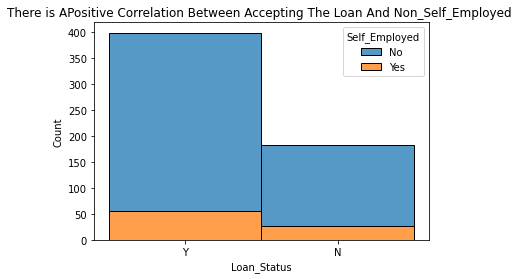

In [1705]:
sns.histplot(binwidth=0.5, x="Loan_Status", hue="Self_Employed", data=df, stat="count", multiple="stack")
plt.title("There is APositive Correlation Between Accepting The Loan And Non_Self_Employed ");

People who are Self_Employed and Loan was approved : 56

People who are Self_Employed and Loan was not approved : 26

People who are not Self_Employed and Loan was approved : 343

People who are not Self_Employed and Loan was not approved : 157

Proportion of non_Self_Employed applicants is higher for the approved loans and i guess may be work in government.

### 6-Is there a relationship between accepting the loan and the ApplicantIncome ? In other words, does the ApplicantIncome have an effect and a reflection on the acceptance of the loan?


In [1706]:
df.groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

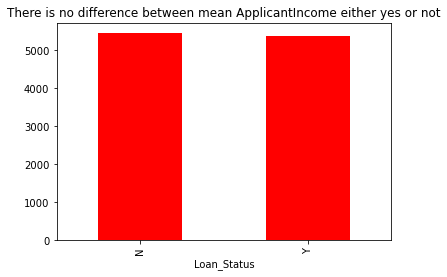

In [1707]:
df.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar(color ="r")
plt.title("There is no difference between mean ApplicantIncome either yes or not");

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

### 7-Is there a relationship between accepting the loan and the CoapplicantIncome ? In other words, does the CoapplicantIncome have an effect and a reflection on the acceptance of the loan?


In [1708]:
df.groupby("Loan_Status")["CoapplicantIncome"].mean()

Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64

<AxesSubplot:xlabel='Loan_Status'>

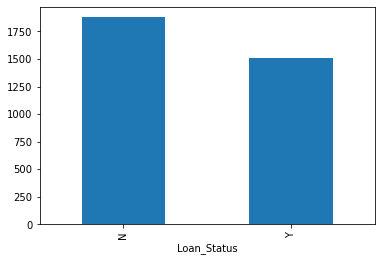

In [1709]:
df.groupby("Loan_Status")["CoapplicantIncome"].mean().plot.bar()

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval and we will do that in feature engineering class.

### 8-Is there a relationship between accepting the loan and the LoanAmount of the applicant? In other words, does the LoanAmount of the applicant have an effect and a reflection on the acceptance of the loan?


In [1710]:
df.groupby("Loan_Status")["LoanAmount"].mean()

Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64

<AxesSubplot:xlabel='Loan_Status'>

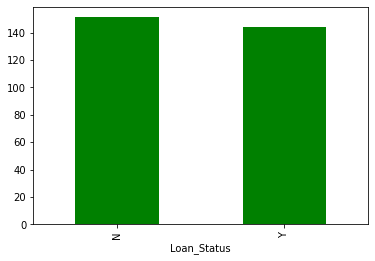

In [1711]:
df.groupby("Loan_Status")["LoanAmount"].mean().plot.bar(color ="g")

It can be seen that the proportion of approved loans is higher for Low Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

### 9-Is there a relationship between accepting the loan and the Loan_Amount_Term of the applicant? In other words, does the Loan_Amount_Term of the applicant have an effect and a reflection on the acceptance of the loan?


In [1712]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1713]:
pd.crosstab(df["Loan_Status"],df["Loan_Amount_Term"])

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
Loan_Status,,,,,,,,,,
N,0,2,0,1,0,15,1,5,153,9
Y,1,0,2,3,3,29,3,8,359,6


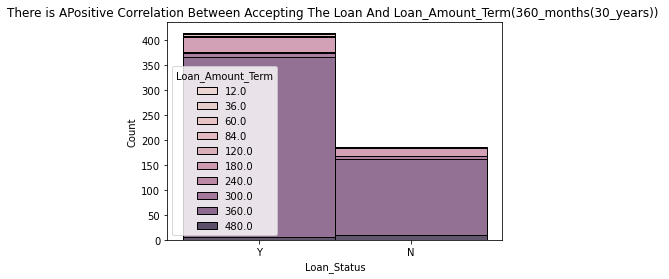

In [1714]:
sns.histplot(binwidth=0.5, x="Loan_Status", hue="Loan_Amount_Term", data=df, stat="count", multiple="stack")
plt.title("There is APositive Correlation Between Accepting The Loan And Loan_Amount_Term(360_months(30_years)) ");

It can be inferred that low_Loan_Amount_Term does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the Loan_Amount_Term is low the chances of loan approval will also be high.

### 10-Is there a relationship between accepting the loan and the Credit_History of the applicant? In other words, does the Credit_History of the applicant have an effect and a reflection on the acceptance of the loan?


In [1715]:
pd.crosstab(df["Loan_Status"],df["Credit_History"])

Credit_History,0.0,1.0
Loan_Status,,
N,82,97
Y,7,378


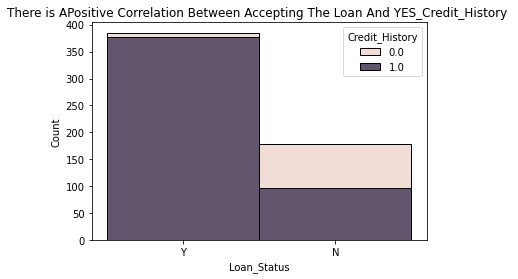

In [1716]:
sns.histplot(binwidth=0.5, x="Loan_Status", hue="Credit_History", data=df, stat="count", multiple="stack")
plt.title("There is APositive Correlation Between Accepting The Loan And YES_Credit_History ");

People with credit history as 1 and loan was approved : 378

People with credit history as 1 and loan was not approved : 97

People with credit history as 0 and loan was approved : 7

People with credit history as 0 and loan was not approved : 82

It seems people with credit history as 1 are more likely to get their loans approved.

### 11-Is there a relationship between accepting the loan and the Property_Area of the applicant? In other words, does the Property_Area of the applicant have an effect and a reflection on the acceptance of the loan?

In [1717]:
pd.crosstab(df["Loan_Status"],df["Property_Area"])

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,69,54,69
Y,110,179,133


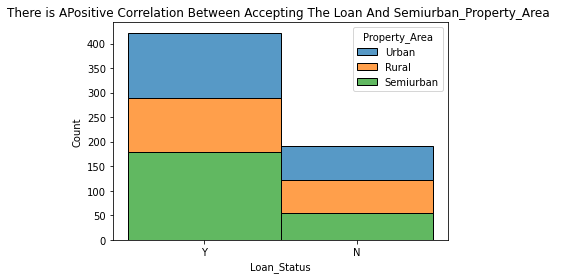

In [1718]:
sns.histplot(binwidth=0.5, x="Loan_Status", hue="Property_Area", data=df, stat="count", multiple="stack")
plt.title("There is APositive Correlation Between Accepting The Loan And Semiurban_Property_Area ");

People who are from Rural area and loan was approved : 110

People who are from Rural area and loan was not approved : 69

People who are from Semiurban area and loan was approved : 179

People who are from Semiurban area and loan was not approved : 54

People who are from Urban area and loan was approved : 133

People who are from Semiurban area and loan was not approved : 69

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

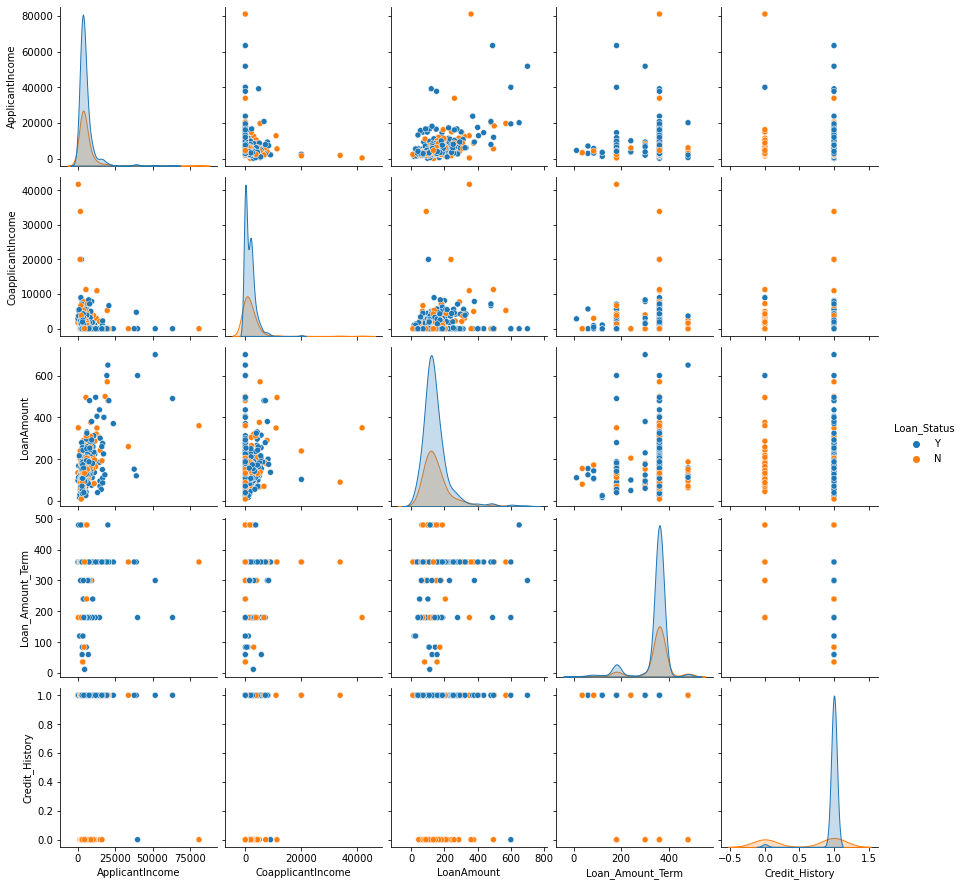

In [1719]:
sns.pairplot(data =df,hue="Loan_Status")

<AxesSubplot:>

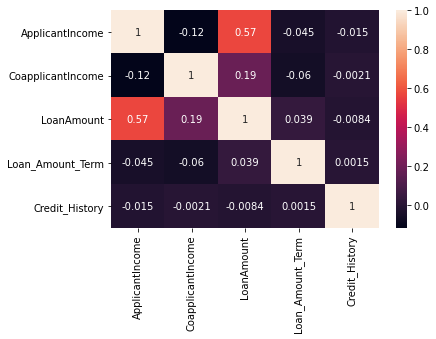

In [1720]:
sns.heatmap(df.corr(),annot=True)

df.corr(method="spearman")
* pearson : standard correlation coefficient
* kendall : Kendall Tau correlation coefficient
* spearman : Spearman rank correlation
import scipy.stats as stats

In [1721]:
#from scipy import stats
#stats.spearmanr(df["Loan_Status"], df["ApplicantIncome"])

# 6.Missing value and outlier treatment

In [167]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [168]:
df[df["Dependents"]=="3+"].count()

Gender               48
Married              51
Dependents           51
Education            51
Self_Employed        49
ApplicantIncome      51
CoapplicantIncome    51
LoanAmount           49
Loan_Amount_Term     50
Credit_History       48
Property_Area        51
Loan_Status          51
dtype: int64

In [169]:
df['Dependents'].replace('3+',3,inplace=True)

In [170]:
df["Dependents"].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [171]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [172]:
def target(r):
    if r == "Y":
        return 1
    else:
        return 0

In [173]:
df["Eligibility_loan"]= df["Loan_Status"].apply(target)
df["Eligibility_loan"]

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Eligibility_loan, Length: 614, dtype: int64

In [174]:
df["Eligibility_loan"].value_counts()

1    422
0    192
Name: Eligibility_loan, dtype: int64

In [175]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Eligibility_loan      0
dtype: int64

In [176]:
df.isna().mean()*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
Eligibility_loan     0.000000
dtype: float64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median

mean for  fractions.
median for no fractions or we can use median for filling categorical variables like years.

For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents,Self_Employed,Loan_Amount_Term, Credit_History features, so we can fill them using the mode of the features

In [177]:
df["Gender"].fillna(value=df["Gender"].mode()[0],inplace = True)

In [178]:
df["Married"].fillna(value=df["Married"].mode()[0],inplace = True)

In [179]:
df["Dependents"].fillna(value=df["Dependents"].mode()[0],inplace = True)

In [180]:
df["Self_Employed"].fillna(value=df["Self_Employed"].mode()[0],inplace = True)

In [181]:
df["Loan_Amount_Term"].fillna(value=df["Loan_Amount_Term"].mode()[0],inplace = True)

In [182]:
df["Credit_History"].fillna(value=df["Credit_History"].mode()[0],inplace = True)

In [183]:
df["LoanAmount"].fillna(value=128.000000,inplace=True)

In [184]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Eligibility_loan     0
dtype: int64

In [185]:
df.isna().mean()*100

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
Eligibility_loan     0.0
dtype: float64

In [186]:
df["LoanAmount"].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [187]:
df["LoanAmount"].unique().tolist()

[128.0,
 66.0,
 120.0,
 141.0,
 267.0,
 95.0,
 158.0,
 168.0,
 349.0,
 70.0,
 109.0,
 200.0,
 114.0,
 17.0,
 125.0,
 100.0,
 76.0,
 133.0,
 115.0,
 104.0,
 315.0,
 116.0,
 112.0,
 151.0,
 191.0,
 122.0,
 110.0,
 35.0,
 201.0,
 74.0,
 106.0,
 320.0,
 144.0,
 184.0,
 80.0,
 47.0,
 75.0,
 134.0,
 96.0,
 88.0,
 44.0,
 286.0,
 97.0,
 135.0,
 180.0,
 99.0,
 165.0,
 258.0,
 126.0,
 312.0,
 136.0,
 172.0,
 81.0,
 187.0,
 113.0,
 176.0,
 130.0,
 111.0,
 167.0,
 265.0,
 50.0,
 210.0,
 175.0,
 131.0,
 188.0,
 25.0,
 137.0,
 160.0,
 225.0,
 216.0,
 94.0,
 139.0,
 152.0,
 118.0,
 185.0,
 154.0,
 85.0,
 259.0,
 194.0,
 93.0,
 370.0,
 182.0,
 650.0,
 102.0,
 290.0,
 84.0,
 242.0,
 129.0,
 30.0,
 244.0,
 600.0,
 255.0,
 98.0,
 275.0,
 121.0,
 63.0,
 700.0,
 87.0,
 101.0,
 495.0,
 67.0,
 73.0,
 260.0,
 108.0,
 58.0,
 48.0,
 164.0,
 170.0,
 83.0,
 90.0,
 166.0,
 124.0,
 55.0,
 59.0,
 127.0,
 214.0,
 240.0,
 72.0,
 60.0,
 138.0,
 42.0,
 280.0,
 140.0,
 155.0,
 123.0,
 279.0,
 192.0,
 304.0,
 330.0,
 150.

In [188]:
df["LoanAmount"]

0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values.

We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

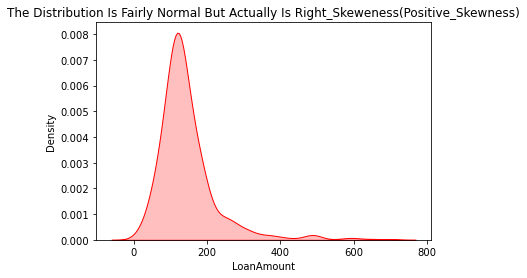

In [189]:
sns.kdeplot(color = "r",data =df,x= "LoanAmount",shade=True)# the distribution is right_skeweness(mean > median)positive skewness
plt.title("The Distribution Is Fairly Normal But Actually Is Right_Skeweness(Positive_Skewness)");

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness.

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.

So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation.

We will do the similar changes to the test file simultaneously.

In [190]:
#df["LoanAmount"]= np.log(df["LoanAmount"])

In [191]:
#sns.kdeplot(color = "r",data =df,x= "LoanAmount",shade=True)# the distribution is right_skeweness(mean > median)positive skewness
#plt.title("The Distribution Is Normal distribution");

In [192]:
#df["LoanAmount"].describe()

# ***7.Feature Engineering***

In [193]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Eligibility_loan'],
      dtype='object')

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

***Total Income***

In [194]:
df["Total_Income"]= df["ApplicantIncome"]+df["CoapplicantIncome"]
df["Total_Income"]

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Total_Income, Length: 614, dtype: float64

In [195]:
df["Total_Income"].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64

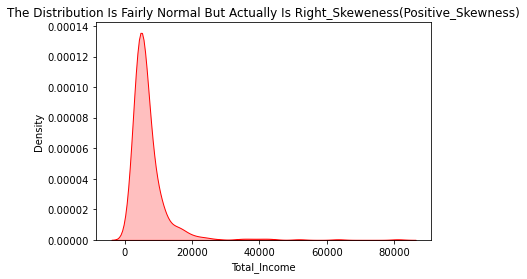

In [196]:
sns.kdeplot(color = "r",data =df,x= "Total_Income",shade=True)# the distribution is right_skeweness(mean > median)positive skewness
plt.title("The Distribution Is Fairly Normal But Actually Is Right_Skeweness(Positive_Skewness)");

***EMI***

What is an EMI?

An equated monthly instalment (EMI) is a set monthly payment provided by a borrower to a creditor on a set day, each month. EMIs apply to both interest and principal each month, and the loan is paid off in full over some years

In [197]:
df["EMI"] = df["LoanAmount"]/df["Loan_Amount_Term"]
df["EMI"].head(20)

0     0.355556
1     0.355556
2     0.183333
3     0.333333
4     0.391667
5     0.741667
6     0.263889
7     0.438889
8     0.466667
9     0.969444
10    0.194444
11    0.302778
12    0.555556
13    0.316667
14    0.141667
15    0.347222
16    0.416667
17    0.211111
18    0.369444
19    0.319444
Name: EMI, dtype: float64

In [198]:
df["EMI"].unique().tolist()

[0.35555555555555557,
 0.18333333333333332,
 0.3333333333333333,
 0.39166666666666666,
 0.7416666666666667,
 0.2638888888888889,
 0.4388888888888889,
 0.4666666666666667,
 0.9694444444444444,
 0.19444444444444445,
 0.30277777777777776,
 0.5555555555555556,
 0.31666666666666665,
 0.14166666666666666,
 0.3472222222222222,
 0.4166666666666667,
 0.2111111111111111,
 0.36944444444444446,
 0.3194444444444444,
 0.28888888888888886,
 0.875,
 0.32222222222222224,
 0.3111111111111111,
 0.41944444444444445,
 0.5305555555555556,
 0.3388888888888889,
 0.3055555555555556,
 0.09722222222222222,
 0.5583333333333333,
 0.20555555555555555,
 0.29444444444444445,
 0.8888888888888888,
 0.2777777777777778,
 0.4,
 0.5111111111111111,
 0.2222222222222222,
 0.13055555555555556,
 0.20833333333333334,
 0.37222222222222223,
 0.26666666666666666,
 0.24444444444444444,
 0.12222222222222222,
 0.7944444444444444,
 0.26944444444444443,
 0.375,
 0.5,
 0.275,
 0.9166666666666666,
 0.7166666666666667,
 0.7,
 0.8666666666

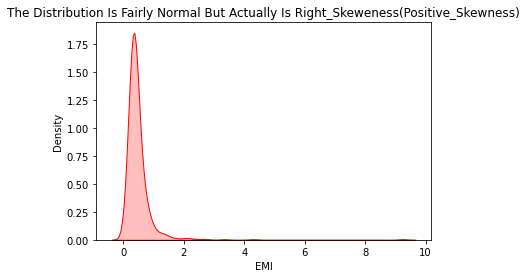

In [199]:
sns.kdeplot(color = "r",data =df,x= "EMI",shade=True)# the distribution is right_skeweness(mean > median)positive skewness
plt.title("The Distribution Is Fairly Normal But Actually Is Right_Skeweness(Positive_Skewness)");

In [200]:
df["Balance_Income"] = df["Total_Income"]-df["EMI"]*1000 # To make the units equal we multiply with 1000
df["Balance_Income"]

0      5493.444444
1      5735.444444
2      2816.666667
3      4607.666667
4      5608.333333
          ...     
609    2702.777778
610    3883.777778
611    7609.222222
612    7063.555556
613    4213.555556
Name: Balance_Income, Length: 614, dtype: float64

In [201]:
df["Balance_Income"].unique().tolist()

[5493.444444444444,
 5735.444444444444,
 2816.6666666666665,
 4607.666666666667,
 5608.333333333333,
 8871.333333333334,
 3585.1111111111113,
 5101.111111111111,
 5065.333333333333,
 22839.555555555555,
 3705.5555555555557,
 4037.222222222222,
 10623.444444444445,
 4376.333333333333,
 2243.3333333333335,
 4602.777777777777,
 3179.3333333333335,
 3298.8888888888887,
 4517.555555555556,
 5780.555555555556,
 7371.111111111111,
 10705.0,
 4188.777777777777,
 4970.888888888889,
 6222.555555555556,
 9029.444444444445,
 4713.111111111111,
 4960.444444444444,
 1344.7777777777778,
 5499.666666666667,
 6976.666666666667,
 2961.4444444444443,
 4397.555555555556,
 4850.333333333333,
 14611.111111111111,
 3986.4444444444443,
 2880.222222222222,
 4726.0,
 10864.888888888889,
 5110.444444444444,
 3377.777777777778,
 2882.4444444444443,
 2191.6666666666665,
 5904.777777777777,
 4428.333333333333,
 3165.5555555555557,
 5526.777777777777,
 5421.0,
 5751.666666666667,
 5875.0,
 3294.222222222222,
 2752.6

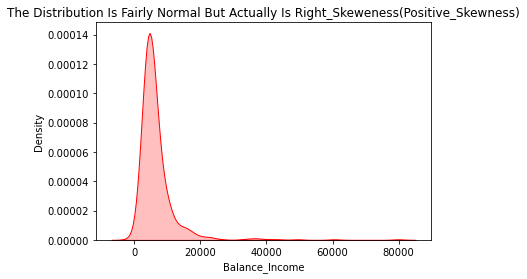

In [202]:
sns.kdeplot(color = "r",data =df,x= "Balance_Income",shade=True)# the distribution is right_skeweness(mean > median)positive skewness
plt.title("The Distribution Is Fairly Normal But Actually Is Right_Skeweness(Positive_Skewness)");

In [203]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Eligibility_loan', 'Total_Income', 'EMI', 'Balance_Income'],
      dtype='object')

In [204]:
df.drop(["ApplicantIncome","CoapplicantIncome","Loan_Status"],axis=1,inplace=True)

In [205]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Eligibility_loan,Total_Income,EMI,Balance_Income
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,1,5849.0,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,1,3000.0,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,1,4941.0,0.333333,4607.666667
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,1,6000.0,0.391667,5608.333333


# data perprocessing

In [206]:
num_features = df.select_dtypes(include="number")
num_features

,LoanAmount,Loan_Amount_Term,Credit_History,Eligibility_loan,Total_Income,EMI,Balance_Income
0,128.0,360.0,1.0,1,5849.0,0.355556,5493.444444
1,128.0,360.0,1.0,0,6091.0,0.355556,5735.444444
2,66.0,360.0,1.0,1,3000.0,0.183333,2816.666667
3,120.0,360.0,1.0,1,4941.0,0.333333,4607.666667
4,141.0,360.0,1.0,1,6000.0,0.391667,5608.333333
...,...,...,...,...,...,...,...
609,71.0,360.0,1.0,1,2900.0,0.197222,2702.777778
610,40.0,180.0,1.0,1,4106.0,0.222222,3883.777778
611,253.0,360.0,1.0,1,8312.0,0.702778,7609.222222
612,187.0,360.0,1.0,1,7583.0,0.519444,7063.555556


In [207]:
cat_features = df.select_dtypes(include="object")
cat_features

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [208]:
cat_features.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [209]:
cat_features.nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
dtype: int64

In [210]:
for feature in cat_features.columns:
    print(f"cat_feature {feature.capitalize()} has      {cat_features[feature].nunique()}     unique values")

cat_feature Gender has      2     unique values
cat_feature Married has      2     unique values
cat_feature Dependents has      4     unique values
cat_feature Education has      2     unique values
cat_feature Self_employed has      2     unique values
cat_feature Property_area has      3     unique values


In [211]:
for feature in cat_features.columns:
    print("the unique cat_feature {}   is   {} " .format(feature,cat_features[feature].nunique()))

the unique cat_feature Gender   is   2 
the unique cat_feature Married   is   2 
the unique cat_feature Dependents   is   4 
the unique cat_feature Education   is   2 
the unique cat_feature Self_Employed   is   2 
the unique cat_feature Property_Area   is   3 


* 1 : you can do any processing on data before pipline process if you avoid data_leackage such as label_encoding
* 2 : import models
* 3 : cross validation(pipline,x(all_data),y,score) for treating (over_fitting(variance),under_fitting(bias),model selection(best_model)
* 4 : pipline(imputing(columns transformers - only columns have missing values )-encoding(columns transformers-only columns need encoding)-scaling(columns transformers-only columns need scaling)-model)# the important (columns transformers)
* 5 : choose the best model based on accuracy
* 6 : grid_search(choose the best parameters based on pipline after choosing best model)(best_model then choose best features(hyper parameter tuning by grid_search)
* 7 : save pipline(model.pkl)
* 8 : save inputs


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     614 non-null    object 
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    object 
 9   Eligibility_loan  614 non-null    int64  
 10  Total_Income      614 non-null    float64
 11  EMI               614 non-null    float64
 12  Balance_Income    614 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 62.5+ KB


In [213]:
df["Credit_History"]=df["Credit_History"].astype(int)

In [214]:
df["Total_Income"]=df["Total_Income"].astype(int)

In [215]:
df["LoanAmount"]=df["LoanAmount"].astype(int)

In [216]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].astype(int)

In [217]:
df["EMI"]= round(df["EMI"],2)

In [218]:
df["Balance_Income"]=df["Balance_Income"].astype(int)

In [219]:
df["Dependents"]=pd.to_numeric(df["Dependents"],errors='coerce')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    int64  
 3   Education         614 non-null    object 
 4   Self_Employed     614 non-null    object 
 5   LoanAmount        614 non-null    int32  
 6   Loan_Amount_Term  614 non-null    int32  
 7   Credit_History    614 non-null    int32  
 8   Property_Area     614 non-null    object 
 9   Eligibility_loan  614 non-null    int64  
 10  Total_Income      614 non-null    int32  
 11  EMI               614 non-null    float64
 12  Balance_Income    614 non-null    int32  
dtypes: float64(1), int32(5), int64(2), object(5)
memory usage: 50.5+ KB


In [221]:
df.duplicated().sum()

0

In [222]:
df.drop(["EMI","Balance_Income"],inplace=True,axis =1)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            614 non-null    object
 1   Married           614 non-null    object
 2   Dependents        614 non-null    int64 
 3   Education         614 non-null    object
 4   Self_Employed     614 non-null    object
 5   LoanAmount        614 non-null    int32 
 6   Loan_Amount_Term  614 non-null    int32 
 7   Credit_History    614 non-null    int32 
 8   Property_Area     614 non-null    object
 9   Eligibility_loan  614 non-null    int64 
 10  Total_Income      614 non-null    int32 
dtypes: int32(4), int64(2), object(5)
memory usage: 43.3+ KB


In [224]:
df.reset_index(drop=True,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Eligibility_loan,Total_Income
0,Male,No,0,Graduate,No,128,360,1,Urban,1,5849
1,Male,Yes,1,Graduate,No,128,360,1,Rural,0,6091
2,Male,Yes,0,Graduate,Yes,66,360,1,Urban,1,3000
3,Male,Yes,0,Not Graduate,No,120,360,1,Urban,1,4941
4,Male,No,0,Graduate,No,141,360,1,Urban,1,6000
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71,360,1,Rural,1,2900
610,Male,Yes,3,Graduate,No,40,180,1,Rural,1,4106
611,Male,Yes,1,Graduate,No,253,360,1,Urban,1,8312
612,Male,Yes,2,Graduate,No,187,360,1,Urban,1,7583


# ***9.Model Building :***

In [271]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder, RobustScaler
from category_encoders .binary import BinaryEncoder 
from sklearn.impute import KNNImputer

In [226]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [227]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Eligibility_loan,Total_Income
0,Male,No,0,Graduate,No,128,360,1,Urban,1,5849
1,Male,Yes,1,Graduate,No,128,360,1,Rural,0,6091
2,Male,Yes,0,Graduate,Yes,66,360,1,Urban,1,3000
3,Male,Yes,0,Not Graduate,No,120,360,1,Urban,1,4941
4,Male,No,0,Graduate,No,141,360,1,Urban,1,6000
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71,360,1,Rural,1,2900
610,Male,Yes,3,Graduate,No,40,180,1,Rural,1,4106
611,Male,Yes,1,Graduate,No,253,360,1,Urban,1,8312
612,Male,Yes,2,Graduate,No,187,360,1,Urban,1,7583


In [228]:
df_cat = df.select_dtypes(include = "object").head()
df_cat

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,No,Graduate,No,Urban
1,Male,Yes,Graduate,No,Rural
2,Male,Yes,Graduate,Yes,Urban
3,Male,Yes,Not Graduate,No,Urban
4,Male,No,Graduate,No,Urban


ordinal_data = Dependents (label_encoder) doesnt need encoding
nominal_data =
Gender,Married,Education,Self_Employed,Loan_Status(one_hot_encoding)first

Property_Area(BinaryEncoder())second 
Scaling on all data 

In [229]:
# Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            614 non-null    object
 1   Married           614 non-null    object
 2   Dependents        614 non-null    int64 
 3   Education         614 non-null    object
 4   Self_Employed     614 non-null    object
 5   LoanAmount        614 non-null    int32 
 6   Loan_Amount_Term  614 non-null    int32 
 7   Credit_History    614 non-null    int32 
 8   Property_Area     614 non-null    object
 9   Eligibility_loan  614 non-null    int64 
 10  Total_Income      614 non-null    int32 
dtypes: int32(4), int64(2), object(5)
memory usage: 43.3+ KB


In [231]:
#Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

In [232]:
#le = LabelEncoder()#Property_Area','Education

In [233]:
#,( "BIE",BinaryEncoder() ,["Self_Employed", "Education", "Property_Area" ])

In [234]:
#Encoder = ColumnTransformer(transformers=[("OHE" , OneHotEncoder(sparse=False , drop="first") , ["Married","Gender","Self_Employed"], ("LabelE" , LabelEncoder() , ["Property_Area","Education" ]))] ,remainder="passthrough"  )

In [ ]:
#imputer = KNNImputer()

In [ ]:
#Emputer = ColumnTransformer(transformers=[("imput" , KNNImputer() , ["Gender" , "Married" , "Education","Self_Employed"]  ) ,( "BIE",BinaryEncoder() ,["Property_Area" ] )  ] ,remainder="passthrough"  )

In [235]:
Encoder = ColumnTransformer(transformers=[("OHE" , OneHotEncoder(sparse=False , drop="first") , ["Gender" , "Married" , "Education","Self_Employed"]  ) ,( "BIE",BinaryEncoder() ,["Property_Area" ] )  ] ,remainder="passthrough"  )

In [236]:
#Encoder = ColumnTransformer(transformers=[("OHE" , OneHotEncoder(sparse=False , drop="first") , ["Gender" , "Married" , "Education","Self_Employed","Property_Area"]  )]  ,remainder="passthrough"  )

In [237]:
steps = list()
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , LogisticRegression()))

In [238]:
pipeline = Pipeline(steps = steps)

In [239]:
pipeline

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender', 'Married',
                                                   'Education',
                                                   'Self_Employed']),
                                                 ('BIE', BinaryEncoder(),
                                                  ['Property_Area'])])),
                ('Scaler', RobustScaler()), ('Model', LogisticRegression())])

In [240]:
x = df.drop("Eligibility_loan" , axis = 1 )
y = df["Eligibility_loan"]

In [241]:
pipeline.fit(x,y)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender', 'Married',
                                                   'Education',
                                                   'Self_Employed']),
                                                 ('BIE', BinaryEncoder(),
                                                  ['Property_Area'])])),
                ('Scaler', RobustScaler()), ('Model', LogisticRegression())])

In [242]:
pipeline.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [243]:
from sklearn.metrics import accuracy_score

In [244]:
accuracy_score(pipeline.predict(x),y)

0.8078175895765473

In [245]:
scores = cross_validate(pipeline , x , y , cv = 5 , scoring="accuracy" , return_train_score=True)  

In [246]:
scores["train_score"].mean()

0.8102611229778285

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [248]:
models = list()
models.append(("LR" , LogisticRegression()))
models.append(("KNN" , KNeighborsClassifier()))
models.append(("CART" , DecisionTreeClassifier()))
models.append(("RF" , RandomForestClassifier()))
models.append(("xg" , XGBClassifier()))



In [249]:
for model in models:
    steps = list()
    steps.append(("Encoder" , Encoder))
    steps.append(("Scaler" , RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    scores = cross_validate(pipeline , x , y , scoring="accuracy"  ,cv = 5 , return_train_score=True)
    print(model[0])
    print("Train_accuracy" , scores["train_score"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores["test_score"].mean())
    print("-" * 20)
    print("\n")

LR
Train_accuracy 0.8102611229778285
----------
Test_accuracy 0.8062108489937359
--------------------


KNN
Train_accuracy 0.8013006474260262
----------
Test_accuracy 0.7278955084632812
--------------------


CART
Train_accuracy 1.0
----------
Test_accuracy 0.672637611622018
--------------------


RF
Train_accuracy 1.0
----------
Test_accuracy 0.7785152605624417
--------------------


[15:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [250]:
from sklearn.model_selection import GridSearchCV

In [251]:
RandomForestClassifier()

RandomForestClassifier()

In [252]:
params = [
        {'Model__criterion':['gini', 'entropy'], 'Model__n_estimators': [100, 110, 120 , 130] }
         ]


In [253]:
steps = list()
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , RandomForestClassifier()))
pipeline = Pipeline(steps = steps)

In [254]:
#for huperparameter_tuning(grid_search)

In [255]:
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=params,
                           scoring='accuracy',
                           cv=10,return_train_score=True, n_jobs=-1)
grid_search.fit(x, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Education',
                                                                          'Self_Employed']),
                                                                        ('BIE',
                                                                         BinaryEncoder(),
                                            

In [256]:
grid_search.best_params_ 

{'Model__criterion': 'gini', 'Model__n_estimators': 130}

In [257]:
grid_search.cv_results_["mean_train_score"].mean()

0.9999773550724638

In [258]:
grid_search.cv_results_["mean_test_score"].mean()

0.7866010047593865

In [259]:
grid_search.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender', 'Married',
                                                   'Education',
                                                   'Self_Employed']),
                                                 ('BIE', BinaryEncoder(),
                                                  ['Property_Area'])])),
                ('Scaler', RobustScaler()),
                ('Model', RandomForestClassifier(n_estimators=130))])

In [260]:
final_model = grid_search.best_estimator_ 

In [261]:
final_model

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender', 'Married',
                                                   'Education',
                                                   'Self_Employed']),
                                                 ('BIE', BinaryEncoder(),
                                                  ['Property_Area'])])),
                ('Scaler', RobustScaler()),
                ('Model', RandomForestClassifier(n_estimators=130))])

In [262]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Total_Income'],
      dtype='object')

In [263]:
final_model.predict(x)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [264]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Total_Income'],
      dtype='object')

In [125]:
inputs = x.columns

In [126]:
import joblib

In [127]:
joblib.dump(final_model , "Model.pkl")
joblib.dump( inputs , "Inputs.pkl" )

['Inputs.pkl']

In [128]:
final_model.predict(x)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [129]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Total_Income'],
      dtype='object')

In [130]:
#%%writefile test.py
#import numpy as np

In [131]:
df["LoanAmount"].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [133]:
#%%writefile app.py  
import streamlit as st
import joblib 
import pandas as pd


Inputs = joblib.load("Inputs.pkl")
Model = joblib.load("Model.pkl")

def predict(Gender, Married, Dependents, Education,Self_Employed,Credit_History,Property_Area,LoanAmount,Loan_Amount_Term,Total_Income):
    test_df = pd.DataFrame(columns = Inputs)
    test_df.at[0,"Gender"] = Gender
    test_df.at[0,"Married"] = Married
    test_df.at[0,"Dependents"] = Dependents 
    test_df.at[0,"Education"] = Education
    test_df.at[0,"Self_Employed"] = Self_Employed
    test_df.at[0,"Credit_History"] = Credit_History
    test_df.at[0,"Property_Area"] = Property_Area
    test_df.at[0,"LoanAmount"] = LoanAmount
    test_df.at[0,"Loan_Amount_Term"] = Loan_Amount_Term
    test_df.at[0,"Total_Income"] = Total_Income
    result = Model.predict(test_df)[0]
    return result
    
def main():
    st.image("housing_loan.jpg")
    st.balloons()
    st.title("Loan_Eligibility_Prediction_App")
    Gender = st.selectbox("Gender" , ['Male', 'Female'])
    Married = st.selectbox("Married" , ["Yes", "No"])
    Dependents = st.selectbox("Dependents" , [0,1, 2,3])
    Education = st.selectbox("Education" , ['Graduate', 'Not Graduate'])
    Self_Employed = st.selectbox("Self_Employed" , ['No', 'Yes'])
    Credit_History = st.selectbox("Credit_History" , [1,0])
    Property_Area = st.selectbox("Property_Area" , ['Semiurban', 'Urban','Rural'])
    LoanAmount = st.slider("LoanAmount" , min_value=9000, max_value=700000, value=0, step=1)
    Loan_Amount_Term = st.slider("Loan_Amount_Term" , min_value=12, max_value=480, value=0, step=1)
    Total_Income = st.slider("Total_Income" , min_value=1442, max_value=81000, value=0, step=1)

    if st.button("Predict"):
        result = predict(Gender, Married, Dependents, Education,Self_Employed,Credit_History,Property_Area,LoanAmount,Loan_Amount_Term,Total_Income)        
        label = ["Approved","Not_Approved"]
        st.text("Your Applicant Is {}".format(label[result]))
if __name__ == '__main__':
    main()
    
    




Writing app.py
